# GD (Gradient Descent)
> Getting your hands dirty with a bit of calculus to implement SGD and undestand it

- toc:true
- branch: master
- badges: true
- comments: true
- author: Juan Cruz Alric
- categories: [deep-learning, jupyter, fastai]

GD is the key that allow us to have a model that can get better and better and look for that perfection. For this we need a way to adjust the parameters so that we can get a better performance from each iteration.

We could look at each individual feature and come up with a set of parameters for each one, such that the highest parameters are associated with those features most likely to be important for a particular output.

This can be represented as a function and set of parameter values for each possible output instance the probability of being correct:

x= features

p=parameters


```
def pr_eight(x,p) = (x*p).sum()
```

x is represented as a vector, with all of the rows stacked up end to end into a single long line (x=[2,3,2,4,3,4,5,6,....,n]) and p is also a vector. If we have this function we only need a way of updating those "p" values until they are good as we can make them.

To be more specific, here are the steps that we are going to require, to turn this function into a machine learning classifier:

1. *Initialize* the weights.
1. For each feature, use these weights to *predict* the output.
1. Based on these predictions, calculate how good the model is (its *loss*).
1. Calculate the *gradient*, which measures for each weight, how changing that weight would change the loss
1. *Step* (that is, change) all the weights based on that calculation.
1. Go back to the step 2, and *repeat* the process.
1. Iterate until you decide to *stop* the training process (for instance, because the model is good enough or you don't want to wait any longer).

- Initialize: We initialize the parameters to random values
- Loss: testing the effectiveness of any current parameter assigment in terms of the actual performance. We need number that will return a small number if the performance was good or a large one if the performance was bad.
- Step: A simple way to figure out whether a weight should be increased or decrease a bit. The best way to do this is by calculating the "gradients". 
- Stop: Once you decided how many epochs (iterations) to train the model for, we apply that decision. Train until we ran out of time or the accuracy of the model starts to get worst.

### Simple case

In [312]:
from fastai.vision.all import *
from fastbook import *

In [313]:
def f(x): return x**2

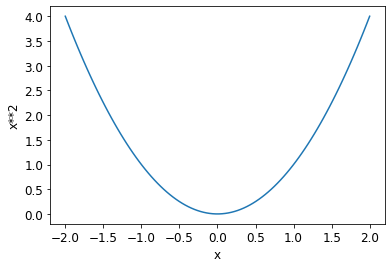

In [314]:
# we can use this functions to create the graph
plot_function(f, 'x', 'x**2')

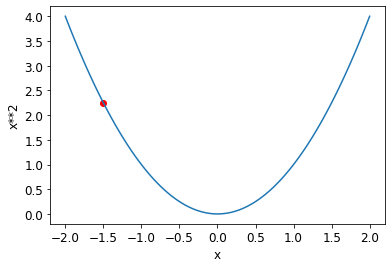

In [315]:
# We can pick a random value
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

If we decide to increment x just for a tiny value we can see that we would descend from the actual spot

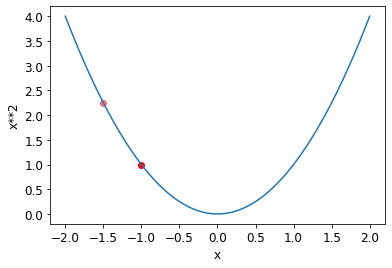

In [316]:
# We can pick a random value
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red', alpha=0.5);
plt.scatter(-1, f(-1), color='red');

We try and get even lower

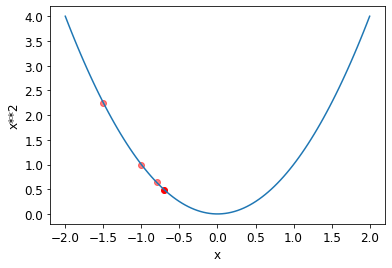

In [317]:
# We can pick a random value
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red', alpha=0.5);
plt.scatter(-1, f(-1), color='red', alpha=0.5);
plt.scatter(-0.8, f(-0.8), color='red', alpha=0.5);
plt.scatter(-0.7, f(-0.7), color='red');

### Calculating the gradient

The "one magic step" is the bit where we calculate the gradients. As we mentioned, we use calculus as a performance optimization; it allows us to more quickly calculate whether our loss will go up or down when we adjust our parameters up or down. In other words, the gradients will tell us how much we have to change each weight to make our model better.

Did you study calculus in school?

If you remember that the derivative of a function tells you how much a change in its parameter will change its result. If not dont worry you just stop for a minute and go and watch this awesome video made by 3blue1brown 

https://www.youtube.com/watch?v=9vKqVkMQHKk&list=PL0-GT3co4r2wlh6UHTUeQsrf3mlS2lk6x&index=2

Now that you refresh about derivatives we can continue

Remember the function x^2? Well its derivative is another function that calculates the change, rather than de value. For instance, the derivative of x^2 at the value 5 tells us how rapidly the function changes at the value 5. When we know how our function will change, then we know what to do to make it smaller. This is the **key to machine learning**: having a way to change the parameters of a function to make it smaller.


One important thing to be aware of is that our function has lots of weights that we need to adjust, so when we calculate the derivative we won't get back one number, but lots of them a gradient for every weight. But there is nothing mathematically tricky here; you can calculate the derivative with respect to one weight, and treat all the other ones as constant, then repeat that for each other weight. This is how all of the gradients are calculated, for every weight.

Well... the best of all of this is that...PyTorch is able to automatically compute the derivative of nearly any function! and its surprinsingly fast

1) Lests pick a tensor value which we want gradients at:

In [318]:
xt = tensor(5.).requires_grad_()

**requires_grad_** is a method brought to us by pytorch. We use it to tell Pytorch that we want to calculate grandients with respect to that variable at that specific value. This will make Pytorch remember to keep track of how to compute grandients of the other.

Now lets calculate the function with that specific value

In [319]:
yt = f(xt)
yt

tensor(25., grad_fn=<PowBackward0>)

Finally we tell Pytorch to calculate the gradient for us

In [320]:
yt.backward()

In [321]:
xt.grad

tensor(10.)

If you remember your high school calculus rules, the derivative of x**2 is 2*x, and we have x=3, so the gradients should be 2*5=10 which is what PyTorch calculated for us!

Lets now do it with a vector instead of only 1 number

In [322]:
xt = tensor([3., 5., 15.]).requires_grad_()
xt

tensor([ 3.,  5., 15.], requires_grad=True)

lets change the first function to add all those numbers in the vector

In [323]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(259., grad_fn=<SumBackward0>)

In [324]:
yt.backward()
xt.grad

tensor([ 6., 10., 30.])

The gradients only tell us the slope of our function, they don't actually tell us exactly how far to adjust the parameters. But it gives us some idea of how far; if the slope is very large, then that may suggest that we have more adjustments to do, whereas if the slope is very small, that may suggest that we are close to the optimal value.

### Adjusting using the Learning rate

Deciding how to modify our parameters based on the values of the gradients is a crusial part of the process of deep learning

We will multiply the gradient by some small number aka "the learning rate (LR)".

Common pick numbers rank between 0.001 and 0.1. Once you have picked a LR, you can adjust your parameters using this simple funtion:

    p -= gradient(p) * lr  ----> this is known as stepping your parameters.

**What happends if you pick a learning rate to small?**

It can mean having to do a lot of steps :(

**What happends if you pick a learning rate to high?**

Well it could actually result in the loss getting worse and bouncing back up

### Lets work on a end-to-end simple example

Lets take a look at GD and see how finding a minimum can be used to train a model to fit data better

Let's start with a simple model. 

Imagine you were measuring the speed of a roller coaster as it went over the top of a hump. It would start fast, and then get slower as it went up the hill; it would be slowest at the top, and it would then speed up again as it went downhill. You want to build a model of how the speed changes over time. If you were measuring the speed manually every second for 60 seconds, it might look something like this:

In [325]:
time = torch.arange(0,20).float()

In [326]:
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [327]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

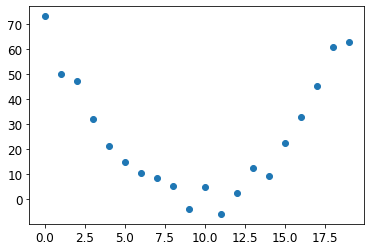

In [328]:
plt.scatter(time, speed);

Lets try and guess that is a "quadratic function" of the form:

a*(time**2)+(b*time)+c

In [329]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

This greatly simplifies the problem, since every quadratic function is fully defined by the three parameters a, b, and c. Thus, to find the best quadratic function, we only need to find the best values for a, b, and c.

We need to define first what we mean by "best." We define this precisely by choosing a loss function, which will return a value based on a prediction and a target, where lower values of the function correspond to "better" predictions. For continuous data, it's common to use mean squared error:

In [330]:
def mse(preds, targets): return ((preds-targets)**2).mean()

Now lets implement the 7 step process from the begining of the post

**Step 1: Initialize the parameters**

We are going to initialized each parameter with a random value and tell Pytorch that we want to track their gradients using _requires_grad_()

In [331]:
params = torch.randn(3).requires_grad_()

We can clone the original parameters to have them just in case

In [332]:
original_parameters = params.clone()

**Step 2: Calculate the predictions**

In [333]:
preds = f(time,params)

Lets see how the predictions are to our real targets

In [334]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

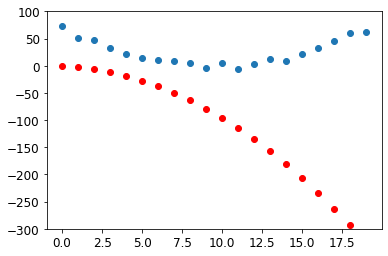

In [335]:
show_preds(preds)

Wow! Terrible our random values think that the roller coster is going backwards... look at the negative speed

Can we do a better job?

Well, lets calculate the loss

**Step 3: Calculate the loss**

In [336]:
loss = mse(preds, speed)

In [337]:
loss

tensor(31688.4062, grad_fn=<MeanBackward0>)

Our goal is now to improve this. To do that, we'll need to know the gradients.

**Step 4: Calculate the gradients**

In [338]:
loss.backward()
params.grad

tensor([-59061.2148,  -3802.9961,   -281.0778])

We can now pick a learning rate to try and adjust this gradients

In [339]:
lr = 0.00001
params.data -= lr * params.grad.data
params.grad = None

Lets see if the loss has improved:

In [340]:
preds = f(time,params)
mse(preds, speed)

tensor(6555.9229, grad_fn=<MeanBackward0>)

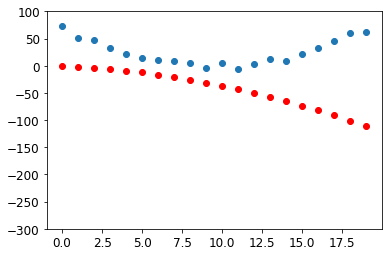

In [341]:
show_preds(preds)

We need to repeat this a few times

In [342]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

**Step 6: Repeat the process**

Now we repeat this process a bunch of times and see if we get any improvements

In [343]:
for i in range(20): apply_step(params)

6555.9228515625
1800.084228515625
900.1290283203125
729.8250732421875
697.5931396484375
691.4888305664062
690.3287353515625
690.1041870117188
690.0565795898438
690.0423583984375
690.0346069335938
690.0282592773438
690.0219116210938
690.015625
690.0093383789062
690.0029907226562
689.9968872070312
689.9906005859375
689.9844360351562
689.9781494140625


In [344]:
# Lets use the original parameters and try to do the whole process again but
# this time with a graph
params = original_parameters.detach().requires_grad_()

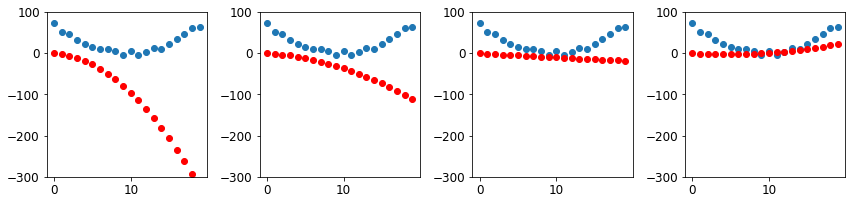

In [345]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

**Step 7: stop**

Just decide a number of epochs and stop the process when you feel happy with the loss

I hope that this post help you undestand a bit more on why we use gradient Descent in machine learning and how powerful it can be. In my next post we will discuss this process in more detail using the Mnist dataset as example to show you GD apply into a real problem.